In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#REading the csv file
df=pd.read_csv('/content/global power.csv')

In [3]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [4]:
#column names
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [5]:
#Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [6]:
df.shape

(907, 27)

#Null values

In [7]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [8]:
df_new=df.drop(columns=['other_fuel1','other_fuel2','other_fuel3','owner','wepp_id','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','latitude','longitude',
                        'generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','generation_gwh_2019','generation_data_source','estimated_generation_gwh','year_of_capacity_data','commissioning_year'])

In [9]:
df_new.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'primary_fuel', 'source', 'url', 'geolocation_source'],
      dtype='object')

In [10]:
df_new.isna().sum()

country                0
country_long           0
name                   0
gppd_idnr              0
capacity_mw            0
primary_fuel           0
source                 0
url                    0
geolocation_source    19
dtype: int64

In [11]:
df_new.shape

(907, 9)

In [12]:
pd.set_option('display.max_columns', None)

In [13]:
df_new.head()

,country,country_long,name,gppd_idnr,capacity_mw,primary_fuel,source,url,geolocation_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,Solar,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,Coal,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,Wind,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI
3,IND,India,AGARTALA GT,IND0000001,135.0,Gas,Central Electricity Authority,http://www.cea.nic.in/,WRI
4,IND,India,AKALTARA TPP,IND0000002,1800.0,Coal,Central Electricity Authority,http://www.cea.nic.in/,WRI


In [14]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             907 non-null    object 
 1   country_long        907 non-null    object 
 2   name                907 non-null    object 
 3   gppd_idnr           907 non-null    object 
 4   capacity_mw         907 non-null    float64
 5   primary_fuel        907 non-null    object 
 6   source              907 non-null    object 
 7   url                 907 non-null    object 
 8   geolocation_source  888 non-null    object 
dtypes: float64(1), object(8)
memory usage: 63.9+ KB


In [15]:
df_new['geolocation_source'].value_counts()

WRI                                     765
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [16]:
df_new['geolocation_source'].fillna(df_new['geolocation_source'].mode()[0], inplace=True)

In [17]:
df_new.isna().sum()

country               0
country_long          0
name                  0
gppd_idnr             0
capacity_mw           0
primary_fuel          0
source                0
url                   0
geolocation_source    0
dtype: int64

In [18]:
df_new.describe()

,capacity_mw
count,907.000000
mean,326.223755
std,590.085456
min,0.000000
25%,16.725000
50%,59.200000
75%,385.250000
max,4760.000000


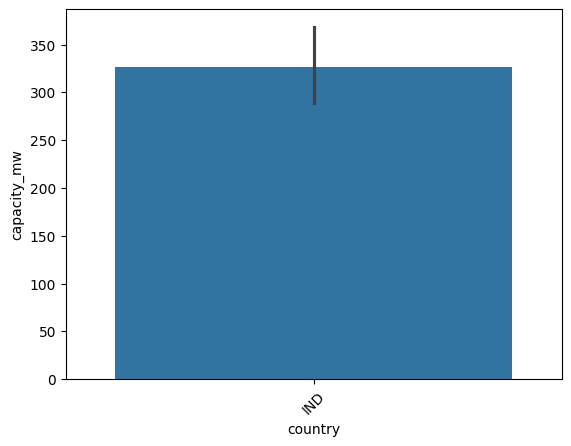

In [19]:
# barplot

sns.barplot(x='country', y='capacity_mw', data=df_new)
plt.xticks(rotation=45)
plt.show()

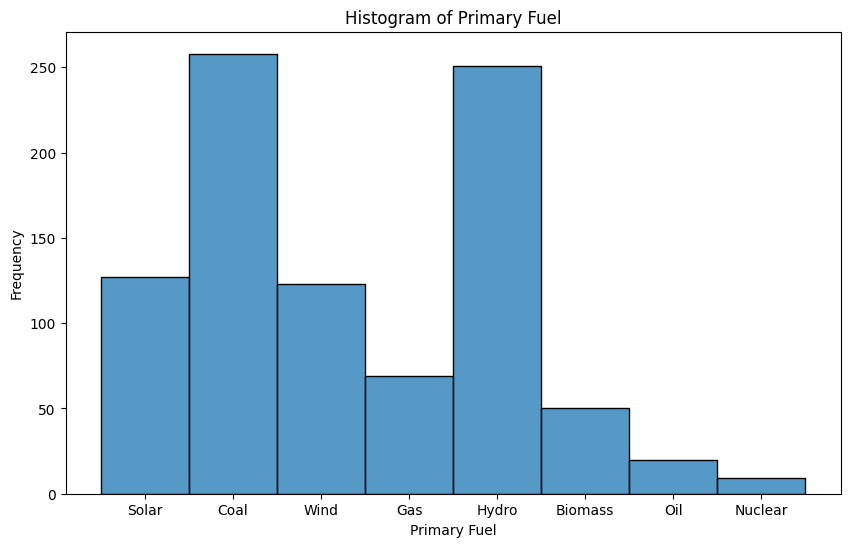

In [132]:
# Histogram of primary_fuel
plt.figure(figsize=(10, 6))
sns.histplot(x=df_new["primary_fuel"], bins=10)
plt.title("Histogram of Primary Fuel")
plt.xlabel("Primary Fuel")
plt.ylabel("Frequency")
plt.show()

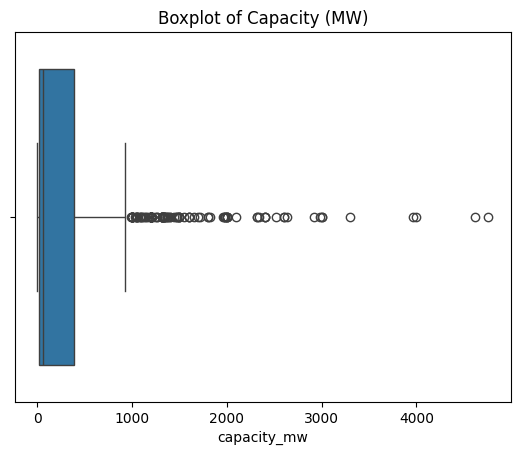

In [129]:
# Boxplot of capacity_mw
sns.boxplot(x=df_new["capacity_mw"])
plt.title("Boxplot of Capacity (MW)")
plt.show()

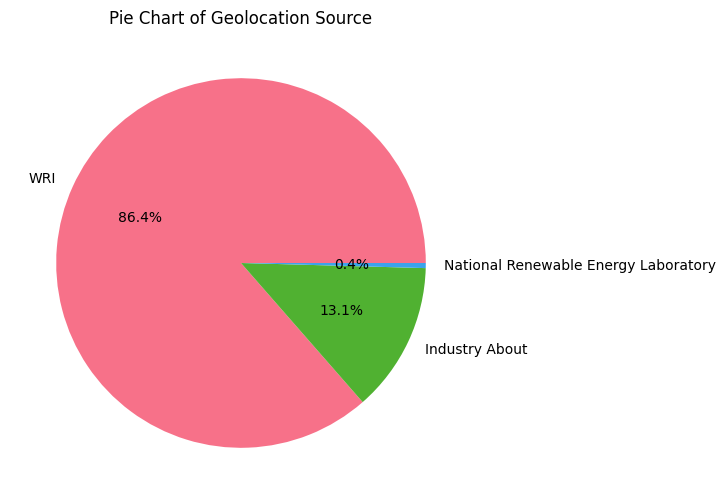

In [131]:
# Pie chart of geolocation_source
labels = df_new["geolocation_source"].value_counts().index.to_list()
sizes = df_new["geolocation_source"].value_counts().to_list()
colors = sns.color_palette("husl", len(labels))

plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%")
plt.title("Pie Chart of Geolocation Source")
plt.show()

In [20]:
df_new['country'].value_counts()

IND    907
Name: country, dtype: int64

In [21]:
df_new['country_long'].value_counts()

India    907
Name: country_long, dtype: int64

In [22]:
df_new=df_new.drop(columns=['country','country_long','gppd_idnr','url'])

In [23]:
df_new.columns

Index(['name', 'capacity_mw', 'primary_fuel', 'source', 'geolocation_source'], dtype='object')

In [24]:
df_new.shape

(907, 5)

In [25]:
#treating outliers
q1 = df_new.quantile(0.25)
q3 = df_new.quantile(0.75)
IQR = q3 - q1
df1 = df_new[~((df_new < (q1 - 1.5 * IQR)) | (df_new > (q3 + 1.5 * IQR))).any(axis=1)]
df1.shape

(794, 5)

In [26]:
df1['primary_fuel'].value_counts()

Hydro      241
Coal       164
Solar      127
Wind       123
Gas         64
Biomass     50
Oil         20
Nuclear      5
Name: primary_fuel, dtype: int64

#LabelEncoder

In [27]:
#changing cat val to digits
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df1.columns:
    if df1[col].dtype == 'O':
        df1[col] = le.fit_transform(df1[col])

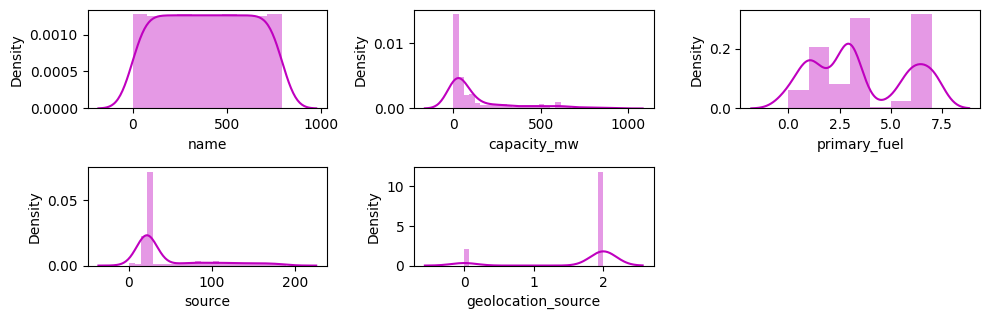

In [28]:
#distribution plot
plt.figure(figsize=(10, 6),facecolor='white')
plotnumber = 1

for i in df1:
  if df1[i].dtype != 'O':
      if plotnumber <= 12:
          ax = plt.subplot(4, 3, plotnumber)
          sns.distplot(df1[i], color='m')  # Use histplot instead of displot for individual axes
          plt.xlabel(i)
          plt.yticks(rotation=0, fontsize=10)
      plotnumber += 1

plt.tight_layout()
plt.show()

In [29]:
df1.skew()

name                  0.000000
capacity_mw           1.870260
primary_fuel          0.281882
source                1.625090
geolocation_source   -1.937960
dtype: float64

<Axes: >

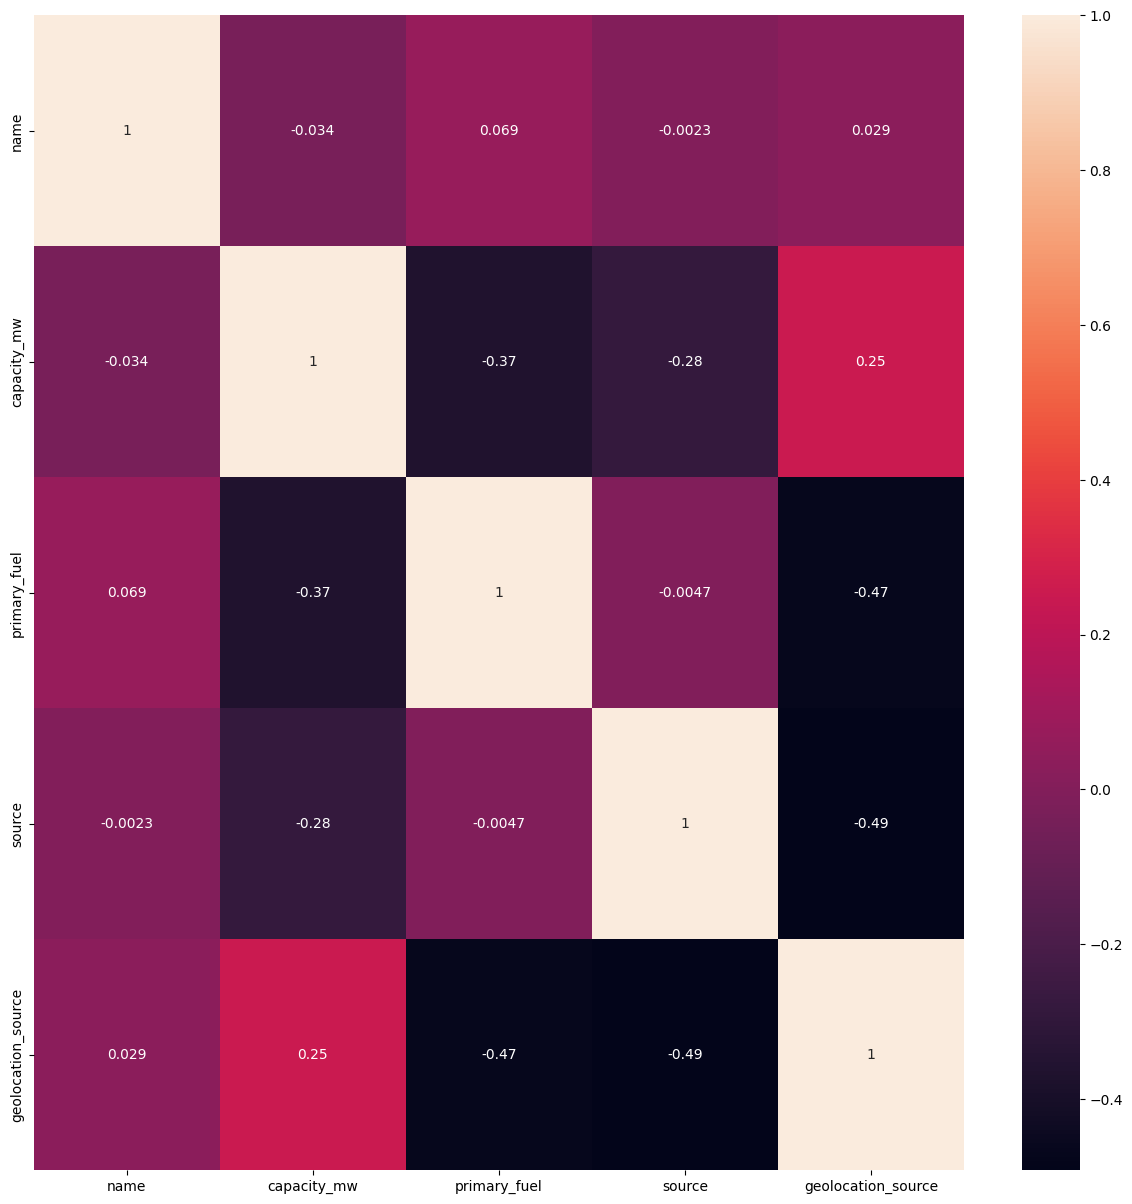

In [30]:
plt.figure(figsize = (15,15))
sns.heatmap(df1.corr(),annot=True)

In [31]:
x=df1.drop('primary_fuel',axis=1)
y=df1['primary_fuel']

In [32]:
#STandazing the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [33]:
#VIF Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['Features'] = x.columns
vif

,VIF Factor,Features
0,1.002663,name
1,1.108465,capacity_mw
2,1.368727,source
3,1.344404,geolocation_source


#Classification

#Model Selection

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxAcc=0
maxRs=0

for i in range(1,200):
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=i)
  RFC=RandomForestClassifier()
  RFC.fit(x_train,y_train)
  pred=RFC.predict(x_test)
  acc=accuracy_score(y_test,pred)
  if acc>maxAcc:
    maxAcc=acc
    maxRs=i

In [35]:
#train-test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=maxRs)

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import accuracy_score,roc_curve,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [37]:
#RandomForestClassifier
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
pred_RFC=RFC.predict(x_test)
print(accuracy_score(y_test,pred_RFC))
print(confusion_matrix(y_test,pred_RFC))
print(classification_report(y_test,pred_RFC))

0.8368200836820083
[[12  4  1  0  0  0  0  0]
 [ 2 32  3  9  0  1  1  0]
 [ 0  1  3  5  0  0  0  0]
 [ 0  4  3 65  2  0  0  0]
 [ 0  0  1  0  0  0  0  0]
 [ 0  0  0  2  0  1  0  0]
 [ 0  0  0  0  0  0 41  0]
 [ 0  0  0  0  0  0  0 46]]
              precision    recall  f1-score   support

           0       0.86      0.71      0.77        17
           1       0.78      0.67      0.72        48
           2       0.27      0.33      0.30         9
           3       0.80      0.88      0.84        74
           4       0.00      0.00      0.00         1
           5       0.50      0.33      0.40         3
           6       0.98      1.00      0.99        41
           7       1.00      1.00      1.00        46

    accuracy                           0.84       239
   macro avg       0.65      0.61      0.63       239
weighted avg       0.84      0.84      0.84       239



In [38]:
#SVC
svc=SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)
print(accuracy_score(y_test,pred_svc))
print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))

0.6150627615062761
[[ 8  6  0  3  0  0  0  0]
 [ 3 31  0 14  0  0  0  0]
 [ 0  1  0  8  0  0  0  0]
 [ 0  6  0 68  0  0  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 0  0  0  3  0  0  0  0]
 [ 0  1  0  0  0  0 40  0]
 [ 0  0  0 46  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.73      0.47      0.57        17
           1       0.69      0.65      0.67        48
           2       0.00      0.00      0.00         9
           3       0.48      0.92      0.63        74
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         3
           6       1.00      0.98      0.99        41
           7       0.00      0.00      0.00        46

    accuracy                           0.62       239
   macro avg       0.36      0.38      0.36       239
weighted avg       0.51      0.62      0.54       239



In [39]:
#GradientBoostingClassifier
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
pred_GB=GB.predict(x_test)
print(accuracy_score(y_test,pred_GB))
print(confusion_matrix(y_test,pred_GB))
print(classification_report(y_test,pred_GB))

0.8451882845188284
[[12  4  0  0  0  0  1  0]
 [ 2 33  3 10  0  0  0  0]
 [ 0  1  2  6  0  0  0  0]
 [ 0  5  3 66  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  0  2  0  1  0  0]
 [ 0  0  0  0  0  0 41  0]
 [ 0  0  0  0  0  0  0 46]]
              precision    recall  f1-score   support

           0       0.86      0.71      0.77        17
           1       0.77      0.69      0.73        48
           2       0.25      0.22      0.24         9
           3       0.79      0.89      0.84        74
           4       1.00      1.00      1.00         1
           5       1.00      0.33      0.50         3
           6       0.98      1.00      0.99        41
           7       1.00      1.00      1.00        46

    accuracy                           0.85       239
   macro avg       0.83      0.73      0.76       239
weighted avg       0.84      0.85      0.84       239



In [40]:
#AdaBoostClassifier
Ada=AdaBoostClassifier()
Ada.fit(x_train,y_train)
pred_Ada=Ada.predict(x_test)
print(accuracy_score(y_test,pred_Ada))
print(confusion_matrix(y_test,pred_Ada))
print(classification_report(y_test,pred_Ada))

0.5564853556485355
[[ 0 17  0  0  0  0  0  0]
 [ 0 18  0 30  0  0  0  0]
 [ 0  0  0  9  0  0  0  0]
 [ 0  0  0 74  0  0  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 0  0  0  3  0  0  0  0]
 [ 0  0  0  0  0  0 41  0]
 [ 0 46  0  0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.22      0.38      0.28        48
           2       0.00      0.00      0.00         9
           3       0.63      1.00      0.77        74
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         3
           6       1.00      1.00      1.00        41
           7       0.00      0.00      0.00        46

    accuracy                           0.56       239
   macro avg       0.23      0.30      0.26       239
weighted avg       0.41      0.56      0.47       239



In [41]:
#BaggingClassifier
bc=BaggingClassifier()
bc.fit(x_train,y_train)
pred_bc=bc.predict(x_test)
print(accuracy_score(y_test,pred_bc))
print(confusion_matrix(y_test,pred_bc))
print(classification_report(y_test,pred_bc))

0.8075313807531381
[[ 9  7  1  0  0  0  0  0]
 [ 2 31  6  8  0  0  1  0]
 [ 0  1  3  5  0  0  0  0]
 [ 0  6  6 61  0  1  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  0  2  0  1  0  0]
 [ 0  0  0  0  0  0 41  0]
 [ 0  0  0  0  0  0  0 46]]
              precision    recall  f1-score   support

           0       0.82      0.53      0.64        17
           1       0.69      0.65      0.67        48
           2       0.19      0.33      0.24         9
           3       0.80      0.82      0.81        74
           4       1.00      1.00      1.00         1
           5       0.50      0.33      0.40         3
           6       0.98      1.00      0.99        41
           7       1.00      1.00      1.00        46

    accuracy                           0.81       239
   macro avg       0.75      0.71      0.72       239
weighted avg       0.82      0.81      0.81       239



In [42]:
#ExtraTreeClassifier
from sklearn.tree import ExtraTreeClassifier
et=ExtraTreeClassifier()
et.fit(x_train,y_train)
pred_et=et.predict(x_test)
print(accuracy_score(y_test,pred_et))
print(confusion_matrix(y_test,pred_et))
print(classification_report(y_test,pred_et))

0.702928870292887
[[ 6  6  1  1  0  3  0  0]
 [ 6 20  6 11  2  2  0  1]
 [ 0  2  2  5  0  0  0  0]
 [ 0 10  5 57  2  0  0  0]
 [ 0  0  1  0  0  0  0  0]
 [ 0  0  0  1  0  2  0  0]
 [ 0  0  1  0  0  0 40  0]
 [ 0  1  0  4  0  0  0 41]]
              precision    recall  f1-score   support

           0       0.50      0.35      0.41        17
           1       0.51      0.42      0.46        48
           2       0.12      0.22      0.16         9
           3       0.72      0.77      0.75        74
           4       0.00      0.00      0.00         1
           5       0.29      0.67      0.40         3
           6       1.00      0.98      0.99        41
           7       0.98      0.89      0.93        46

    accuracy                           0.70       239
   macro avg       0.52      0.54      0.51       239
weighted avg       0.73      0.70      0.71       239



#Hyper Parameter Tuning

In [43]:
from sklearn.model_selection import GridSearchCV
# Create a dictionary of hyperparameters to search over for RFC
hyperparameters = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [44]:
#For Randon forest classifier
GVC = GridSearchCV(RFC, hyperparameters, cv=5, scoring='accuracy')

In [45]:
GVC.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': [0.5, 0.7, 1.0],
                         'max_samples': [0.5, 0.7, 1.0],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy')

In [46]:
GVC.best_estimator_
#GVC.best_params_

RandomForestClassifier(max_features=1.0, max_samples=0.7, min_samples_leaf=4,
                       min_samples_split=5)

In [56]:
final_model_rf= RandomForestClassifier(max_features=0.5, max_samples=1.0, min_samples_leaf=4,
                       min_samples_split=5, n_estimators=50)
final_model_rf.fit(x_train,y_train)
pred=final_model_rf.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

87.02928870292888


In [48]:
# Create a dictionary of hyperparameters to search over for GradientBoostingClassifier
hyperparameters = {
    'n_estimators': [10, 50, 100],
    'learning_rate': [0.1, 0.5, 1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [49]:
GVC = GridSearchCV(GradientBoostingClassifier(), hyperparameters, cv=5, scoring='accuracy')
GVC.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.5, 1], 'max_depth': [3, 5, 7],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy')

In [50]:
GVC.best_estimator_
#GVC.best_params_

GradientBoostingClassifier(min_samples_leaf=2, n_estimators=10)

In [58]:
final_model_gb= GradientBoostingClassifier(min_samples_leaf=2, n_estimators=10)
final_model_gb.fit(x_train,y_train)
pred=final_model_gb.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

83.68200836820083


#Cross Validation

In [57]:
#check cv score for randomforest

score=cross_val_score(final_model_rf,x,y)
print(score)
print(score.mean())
print('Difference between accuracy score and cross valication score is', accuracy_score(y_test,pred_RFC) - score.mean())

[0.74213836 0.77358491 0.73584906 0.7672956  0.7721519 ]
0.7582039646524958
Difference between accuracy score and cross valication score is 0.07861611902951249


In [60]:
#check cv score for GradientBoostingClassifier

score=cross_val_score(final_model_gb,x,y)
print(score)
print(score.mean())
print('Difference between accuracy score and cross valication score is', accuracy_score(y_test,pred_RFC) - score.mean())

[0.67295597 0.77358491 0.77987421 0.81761006 0.7721519 ]
0.7632354111933763
Difference between accuracy score and cross valication score is 0.07358467248863199


#Regression

In [62]:
df_new.columns

Index(['name', 'capacity_mw', 'primary_fuel', 'source', 'geolocation_source'], dtype='object')

In [72]:
x=df_new.drop('capacity_mw',axis=1)
y=df_new['capacity_mw']

In [73]:
#changing cat val to digits
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in x.columns:
    if x[col].dtype == 'O':
        x[col] = le.fit_transform(x[col])

In [74]:
x

,name,primary_fuel,source,geolocation_source
0,0,6,109,1
1,1,1,174,2
2,2,7,21,2
3,3,2,22,2
4,4,1,22,2
...,...,...,...,...
902,902,1,22,2
903,903,6,77,0
904,904,7,21,2
905,905,1,59,2


In [75]:
x.skew()

name                  0.000000
primary_fuel          0.472251
source                1.827373
geolocation_source   -2.159841
dtype: float64

In [76]:
x['source']=np.log1p(x['source'])
x.skew()

name                  0.000000
primary_fuel          0.472251
source                0.866582
geolocation_source   -2.159841
dtype: float64

In [77]:
x['geolocation_source']=np.cbrt(x['geolocation_source'])
x.skew()

name                  0.000000
primary_fuel          0.472251
source                0.866582
geolocation_source   -2.182012
dtype: float64

In [78]:
x.isna().sum()

name                  0
primary_fuel          0
source                0
geolocation_source    0
dtype: int64

In [79]:
#STandazing the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [80]:
#VIF Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['Features'] = x.columns
vif

,VIF Factor,Features
0,1.005143,name
1,1.379834,primary_fuel
2,1.329564,source
3,1.729584,geolocation_source


In [81]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [82]:
#finding best random state
maxAcc=0
maxRs=0

for i in range(1,200):
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=i)
  lr=LinearRegression()
  lr.fit(x_train,y_train)
  pred=lr.predict(x_test)
  acc=r2_score(y_test,pred)
  if acc>maxAcc:
    maxAcc=acc
    maxRs=i
print('Best Accuracy', maxAcc, 'random_state is', maxRs)

Best Accuracy 0.2786493500984486 random_state is 8


#Train Test Split

In [83]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=maxRs)

In [84]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso, Ridge

In [85]:
#Linear regression
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
print('R2 Score',r2_score(y_test,pred_lr))
print('MAE',mean_absolute_error(y_test,pred_lr))
print('MSE',mean_squared_error(y_test,pred_lr))
print('RMSE',np.sqrt(mean_squared_error(y_test,pred_lr)))

R2 Score 0.2786493500984486
MAE 304.4519674309488
MSE 190503.45667131295
RMSE 436.4670167049429


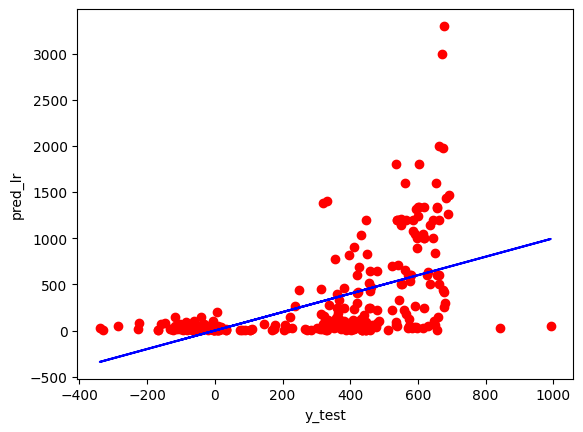

In [86]:
plt.scatter(x=pred_lr,y=y_test,color='red')
plt.plot(pred_lr,pred_lr,color='blue')
plt.xlabel('y_test')
plt.ylabel('pred_lr')
plt.show()

In [87]:
#RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_rfr=rfr.predict(x_test)
print('R2 Score',r2_score(y_test,pred_rfr))
print('MAE',mean_absolute_error(y_test,pred_rfr))
print('MSE',mean_squared_error(y_test,pred_rfr))
print('RMSE',np.sqrt(mean_squared_error(y_test,pred_rfr)))

R2 Score 0.07712602086528642
MAE 267.00284886446883
MSE 243724.30124124294
RMSE 493.6844146225835


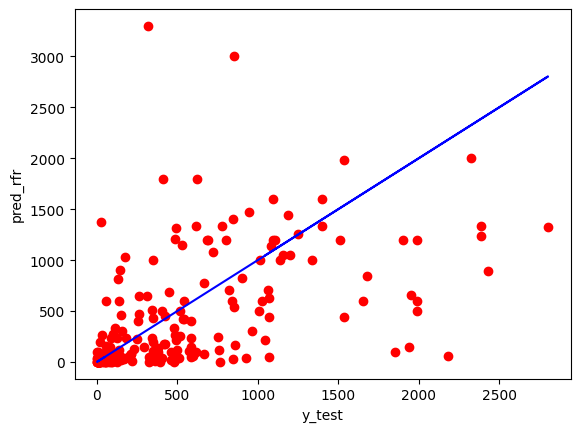

In [88]:
plt.scatter(x=pred_rfr,y=y_test,color='red')
plt.plot(pred_rfr,pred_rfr,color='blue')
plt.xlabel('y_test')
plt.ylabel('pred_rfr')
plt.show()

In [89]:
#KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
print('R2 Score',r2_score(y_test,pred_knn))
print('MAE',mean_absolute_error(y_test,pred_knn))
print('MSE',mean_squared_error(y_test,pred_knn))
print('RMSE',np.sqrt(mean_squared_error(y_test,pred_knn)))

R2 Score 0.26332754890678967
MAE 242.2990278388278
MSE 194549.83285443558
RMSE 441.07803488094436


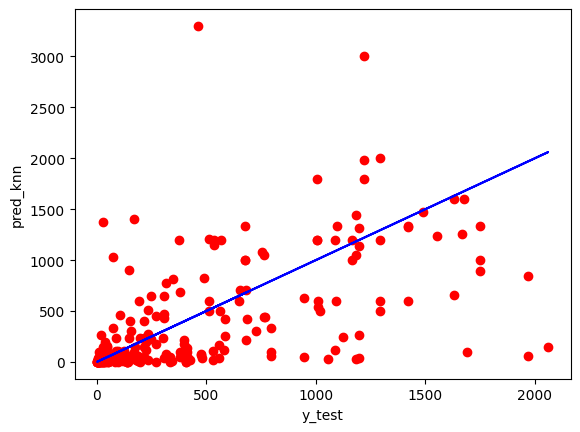

In [90]:
plt.scatter(x=pred_knn,y=y_test,color='red')
plt.plot(pred_knn,pred_knn,color='blue')
plt.xlabel('y_test')
plt.ylabel('pred_knn')
plt.show()

In [91]:
#GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred_gbr=gbr.predict(x_test)
print('R2 Score',r2_score(y_test,pred_gbr))
print('MAE',mean_absolute_error(y_test,pred_gbr))
print('MSE',mean_squared_error(y_test,pred_gbr))
print('RMSE',np.sqrt(mean_squared_error(y_test,pred_gbr)))

R2 Score 0.35876301219393003
MAE 236.73226222912228
MSE 169346.0215766476
RMSE 411.51673304575064


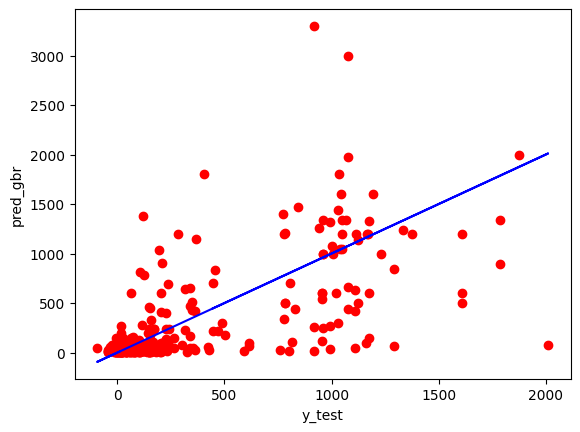

In [92]:
plt.scatter(x=pred_gbr,y=y_test,color='red')
plt.plot(pred_gbr,pred_gbr,color='blue')
plt.xlabel('y_test')
plt.ylabel('pred_gbr')
plt.show()

In [93]:
#Lasso
lasso=Lasso()
lasso.fit(x_train,y_train)
pred_lasso=lasso.predict(x_test)
print('R2 Score',r2_score(y_test,pred_lasso))
print('MAE',mean_absolute_error(y_test,pred_lasso))
print('MSE',mean_squared_error(y_test,pred_lasso))
print('RMSE',np.sqrt(mean_squared_error(y_test,pred_lasso)))

R2 Score 0.27932224410925577
MAE 303.5031736918275
MSE 190325.75026036054
RMSE 436.2633955082188


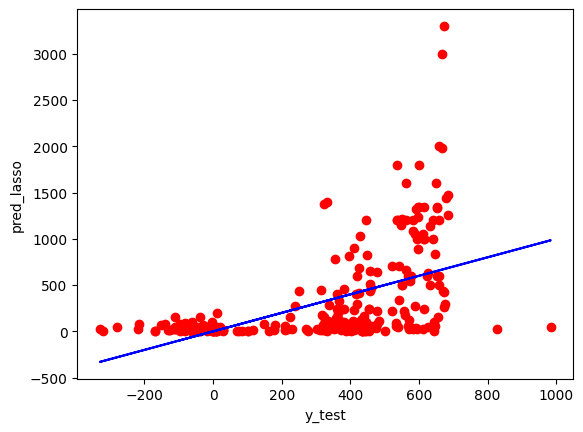

In [94]:
plt.scatter(x=pred_lasso,y=y_test,color='red')
plt.plot(pred_lasso,pred_lasso,color='blue')
plt.xlabel('y_test')
plt.ylabel('pred_lasso')
plt.show()

In [95]:
ridge=Ridge()
ridge.fit(x_train,y_train)
pred_ridge=ridge.predict(x_test)
print('R2 Score',r2_score(y_test,pred_ridge))
print('MAE',mean_absolute_error(y_test,pred_ridge))
print('MSE',mean_squared_error(y_test,pred_ridge))
print('RMSE',np.sqrt(mean_squared_error(y_test,pred_ridge)))

R2 Score 0.27879391937821585
MAE 304.1827131708466
MSE 190465.27697669718
RMSE 436.42327730850604


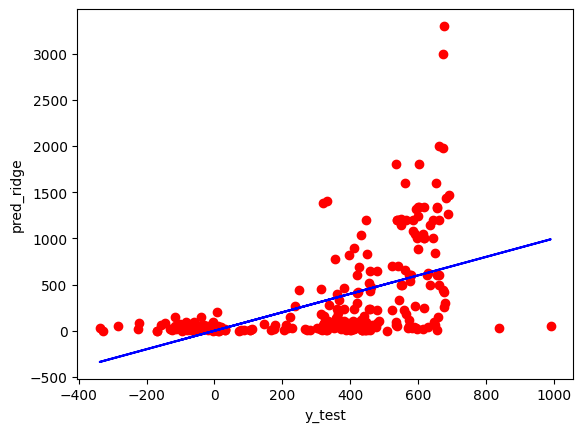

In [96]:
plt.scatter(x=pred_ridge,y=y_test,color='red')
plt.plot(pred_ridge,pred_ridge,color='blue')
plt.xlabel('y_test')
plt.ylabel('pred_ridge')
plt.show()

In [97]:
#DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
print('R2 Score',r2_score(y_test,pred_dtr))
print('MAE',mean_absolute_error(y_test,pred_dtr))
print('MSE',mean_squared_error(y_test,pred_dtr))
print('RMSE',np.sqrt(mean_squared_error(y_test,pred_dtr)))

R2 Score -0.24121053030828032
MAE 301.6074212454212
MSE 327794.6675626227
RMSE 572.5335514732938


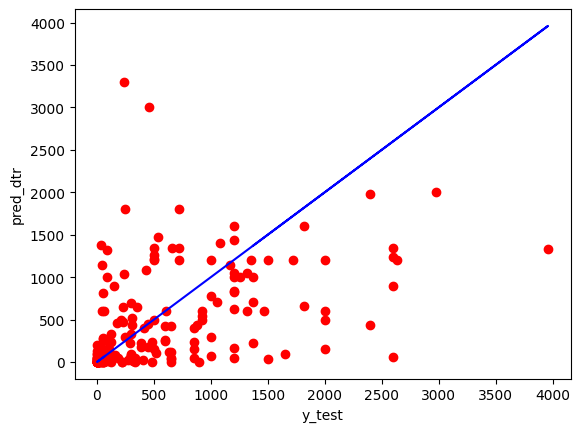

In [98]:
plt.scatter(x=pred_dtr,y=y_test,color='red')
plt.plot(pred_dtr,pred_dtr,color='blue')
plt.xlabel('y_test')
plt.ylabel('pred_dtr')
plt.show()

In [99]:
#svr
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
print('R2 Score',r2_score(y_test,pred_svr))
print('MAE',mean_absolute_error(y_test,pred_svr))
print('MSE',mean_squared_error(y_test,pred_svr))
print('RMSE',np.sqrt(mean_squared_error(y_test,pred_svr)))

R2 Score -0.17345091712188276
MAE 282.367177248533
MSE 309899.846872461
RMSE 556.68648885388


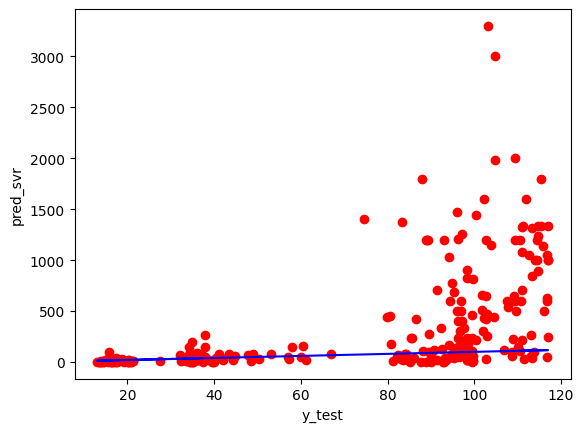

In [100]:
plt.scatter(x=pred_svr,y=y_test,color='red')
plt.plot(pred_svr,pred_svr,color='blue')
plt.xlabel('y_test')
plt.ylabel('pred_svr')
plt.show()

In [101]:
#ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr=etr.predict(x_test)
print('R2 Score',r2_score(y_test,pred_etr))
print('MAE',mean_absolute_error(y_test,pred_etr))
print('MSE',mean_squared_error(y_test,pred_etr))
print('RMSE',np.sqrt(mean_squared_error(y_test,pred_etr)))

R2 Score -0.02094578552537052
MAE 284.6564777289377
MSE 269624.3515454462
RMSE 519.2536485624788


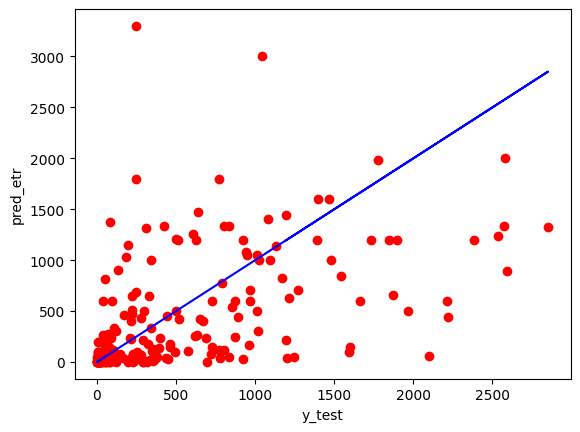

In [102]:
plt.scatter(x=pred_etr,y=y_test,color='red')
plt.plot(pred_etr,pred_etr,color='blue')
plt.xlabel('y_test')
plt.ylabel('pred_etr')
plt.show()

#Using ANN Model

In [103]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [105]:
# Build the ANN Model
model =Sequential([
   Dense(units=64, activation='relu', input_dim=x_train.shape[1]),
   Dense(units=32, activation='relu'),
   Dense(units=1, activation='linear')  # Linear activation for regression
])

In [106]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [117]:
# Train the Model
model.fit(x_train, y_train, epochs=1000, batch_size=32, verbose=2)

Epoch 1/1000
20/20 - 0s - loss: 250424.9844 - 132ms/epoch - 7ms/step
Epoch 2/1000
20/20 - 0s - loss: 249985.3125 - 103ms/epoch - 5ms/step
Epoch 3/1000
20/20 - 0s - loss: 250017.2812 - 95ms/epoch - 5ms/step
Epoch 4/1000
20/20 - 0s - loss: 249848.9844 - 86ms/epoch - 4ms/step
Epoch 5/1000
20/20 - 0s - loss: 249580.6250 - 84ms/epoch - 4ms/step
Epoch 6/1000
20/20 - 0s - loss: 249468.7656 - 99ms/epoch - 5ms/step
Epoch 7/1000
20/20 - 0s - loss: 249223.3750 - 88ms/epoch - 4ms/step
Epoch 8/1000
20/20 - 0s - loss: 249103.3750 - 146ms/epoch - 7ms/step
Epoch 9/1000
20/20 - 0s - loss: 249430.6875 - 85ms/epoch - 4ms/step
Epoch 10/1000
20/20 - 0s - loss: 248743.1875 - 127ms/epoch - 6ms/step
Epoch 11/1000
20/20 - 0s - loss: 249004.0312 - 90ms/epoch - 5ms/step
Epoch 12/1000
20/20 - 0s - loss: 248661.3281 - 71ms/epoch - 4ms/step
Epoch 13/1000
20/20 - 0s - loss: 248435.5156 - 71ms/epoch - 4ms/step
Epoch 14/1000
20/20 - 0s - loss: 248305.6094 - 106ms/epoch - 5ms/step
Epoch 15/1000
20/20 - 0s - loss: 24817

In [118]:
# Evaluate the Model
mse = model.evaluate(x_test, y_test)
print("Mean Squared Error:", mse)

9/9 [==============================] - 0s 2ms/step - loss: 141522.6406
Mean Squared Error: 141522.640625


In [119]:
# Make predictions
predictions = model.predict(x_test)

9/9 [==============================] - 0s 2ms/step


In [120]:
# Evaluate the model performance
from sklearn.metrics import r2_score
score = r2_score(y_test, predictions)
print(f"R-squared score: {score}")

R-squared score: 0.4641175984211182


In [125]:
predicted_values = model.predict(x_test).flatten()

predicted_values

9/9 [==============================] - 0s 9ms/step


array([ 3.58158379e+01, -9.27921906e+01,  2.01308578e+02,  1.99044022e+02,
        4.09542267e+02,  6.46871662e+00,  1.98673767e+02,  4.09675598e+02,
        1.88709167e+02,  2.22363644e+01,  4.53512230e+01,  5.49208313e+02,
        1.20094153e+03,  1.66439285e+02,  1.20181494e+03,  1.65456085e+02,
        1.79694763e+02,  1.99665344e+02,  2.10349533e+02,  5.62124348e+00,
        5.09583015e+01,  1.84310104e+02,  3.00549652e+02,  2.67641430e+01,
       -8.57087994e+00,  5.18571899e+02,  2.07468002e+02,  1.88297836e+02,
        1.32036514e+02,  1.89441391e+02,  1.20437305e+03,  8.86318970e+02,
        1.99266556e+02,  1.64035843e+02,  8.01140564e+02, -9.93539581e+01,
       -2.02392139e+01,  9.56515625e+02, -1.56659727e+01,  3.64659180e+02,
        4.48885307e+01,  2.07308517e+02,  1.75507004e+02,  3.80446281e+01,
        1.20101929e+03,  1.84992599e+02,  1.71355499e+02,  2.32500744e+01,
       -3.89336681e+00,  1.20218933e+03,  1.20013037e+03,  3.19782501e+02,
        2.97899075e+01,  

In [126]:
conclusion = pd.DataFrame([predicted_values, y_test.values], index=['Predicted', 'Original']).T


In [127]:
conclusion

,Predicted,Original
0,35.815838,20.00
1,-92.792191,30.75
2,201.308578,400.00
3,199.044022,130.00
4,409.542267,440.00
...,...,...
268,248.641678,150.00
269,7.089551,21.00
270,16.348372,22.50
271,366.662598,468.57
